In [2]:
from itertools import permutations
from math import factorial

def compute_shapley_values(n):
  total_value = n
  agents = [agent for agent in range(0, n)]
  agents_cost = [agent + 1 for agent in agents]
  shapley_values = {agent: 0 for agent in agents}
  
  all_permutations = permutations(agents)

  number_of_considered_permutations = 0
  for permutation in all_permutations:
    number_of_considered_permutations += 1

    already_paid_on_current_permutation = 0
    for index, agent in enumerate(permutation):
      S = permutation[:index]
      if agents_cost[agent] > already_paid_on_current_permutation:
        current_agent_to_pay = agents_cost[agent] - already_paid_on_current_permutation
      else:
        current_agent_to_pay = 0

      already_paid_on_current_permutation += current_agent_to_pay
      shapley_values[agent] += current_agent_to_pay

  # Now we will compute the mean over all the considered permutations
  shapley_values = {key: value / number_of_considered_permutations for key, value in shapley_values.items()}
  
  assert sum(shapley_values.values()) == max(agents_cost)
  return shapley_values

print("Shapley values for given problem and 4 agents\n")
print(compute_shapley_values(4))

print("\n\nShapley values for given problem and 5 agents\n")
print(compute_shapley_values(5))

Shapley values for given problem and 4 agents

{0: 0.25, 1: 0.5833333333333334, 2: 1.0833333333333333, 3: 2.0833333333333335}


Shapley values for given problem and 5 agents

{0: 0.2, 1: 0.45, 2: 0.7833333333333333, 3: 1.2833333333333334, 4: 2.283333333333333}


Shapley values for given problem and 100 agents

{0: 0.0106, 1: 0.0192, 2: 0.0266, 3: 0.0335, 4: 0.0599, 5: 0.0596, 6: 0.0724, 7: 0.0755, 8: 0.0878, 9: 0.1007, 10: 0.1131, 11: 0.1327, 12: 0.1444, 13: 0.1571, 14: 0.1877, 15: 0.1545, 16: 0.1682, 17: 0.19, 18: 0.1906, 19: 0.2373, 20: 0.2643, 21: 0.1989, 22: 0.2714, 23: 0.2461, 24: 0.2942, 25: 0.2579, 26: 0.3346, 27: 0.3654, 28: 0.3262, 29: 0.3711, 30: 0.3524, 31: 0.4366, 32: 0.3676, 33: 0.4771, 34: 0.4158, 35: 0.4008, 36: 0.4667, 37: 0.4738, 38: 0.486, 39: 0.4932, 40: 0.4999, 41: 0.5058, 42: 0.5927, 43: 0.6538, 44: 0.6221, 45: 0.6286, 46: 0.6469, 47: 0.6838, 48: 0.6318, 49: 0.6857, 50: 0.6235, 51: 0.7853, 52: 0.7643, 53: 0.735, 54: 0.6816, 55: 0.9224, 56: 0.7801, 57: 0.7733, 58: 0.8731, 59: 0.9965, 60: 0.8807, 61: 0.9005, 62: 1.1364, 63: 0.9584, 64: 1.0472, 65: 1.1084, 66: 1.0994, 67: 1.0448, 68: 1.1085, 69: 1.1848, 70: 1.2902, 71: 1.3662, 72: 1.3207, 73: 1.3024, 74: 1.3226, 75: 1.4674, 76: 1.4031, 77: 1.505, 78: 1.4857, 79: 1.4826, 80: 1

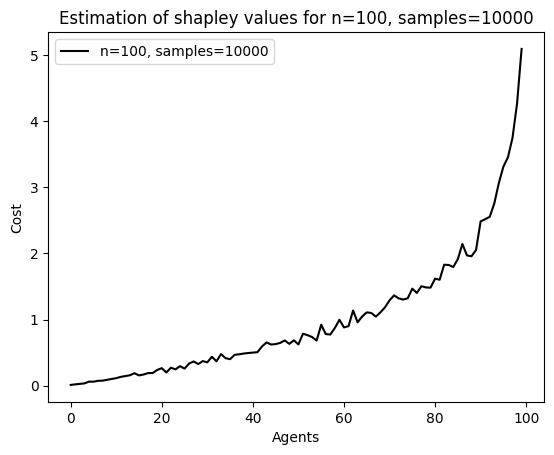

In [35]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

def estimate_shapley_values(n, number_of_samples):
  total_value = n
  agents = [agent for agent in range(0, n)]
  agents_cost = [agent + 1 for agent in agents]
  shapley_values = {agent: 0 for agent in agents}
  
  number_of_considered_permutations = 0
  for sample_index in range(number_of_samples):
    permutation = np.random.permutation(agents)
    number_of_considered_permutations += 1

    already_paid_on_current_permutation = 0
    for index, agent in enumerate(permutation):
      S = permutation[:index]
      if agents_cost[agent] > already_paid_on_current_permutation:
        current_agent_to_pay = agents_cost[agent] - already_paid_on_current_permutation
      else:
        current_agent_to_pay = 0

      already_paid_on_current_permutation += current_agent_to_pay
      shapley_values[agent] += current_agent_to_pay

  # Now we will compute the mean over all the considered permutations
  shapley_values = {key: value / number_of_considered_permutations for key, value in shapley_values.items()}
  
  return shapley_values

print("Shapley values for given problem and 100 agents\n")
estimated_shapley_values = estimate_shapley_values(100, 10000)
print(estimated_shapley_values)
plt.plot(estimated_shapley_values.values(), color='black', label=f"n=100, samples=10000")
plt.xlabel('Agents')
plt.ylabel('Cost')
plt.legend()
plt.title(f"Estimation of shapley values for n=100, samples=10000")
plt.show()

### Running multiple experiments

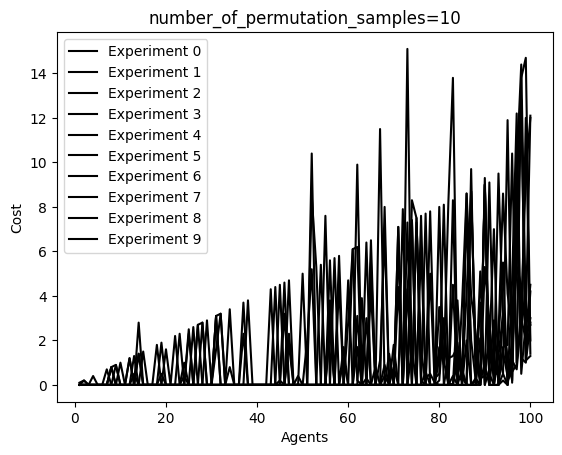

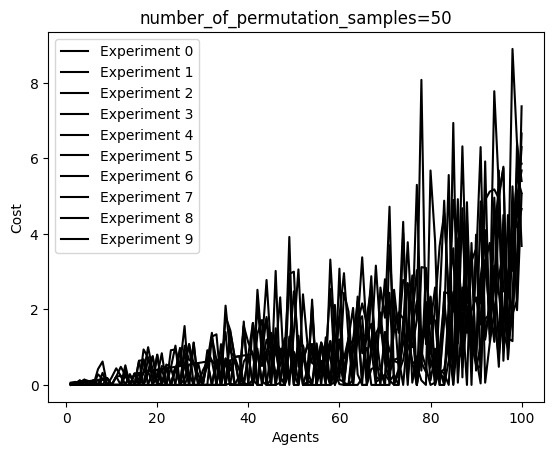

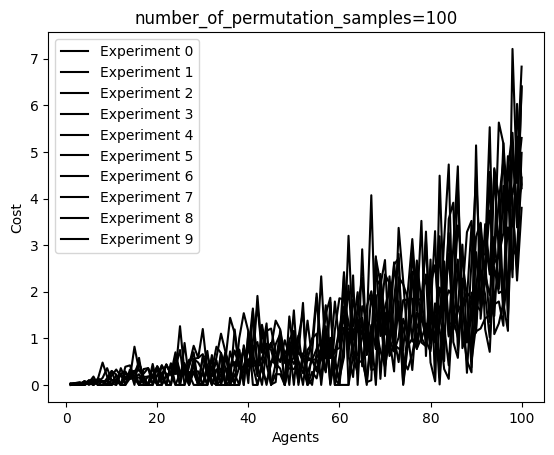

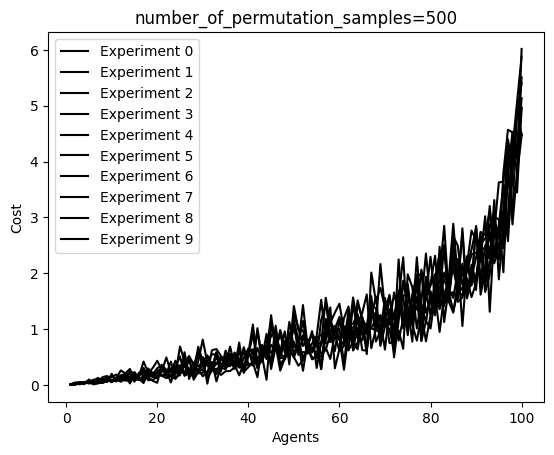

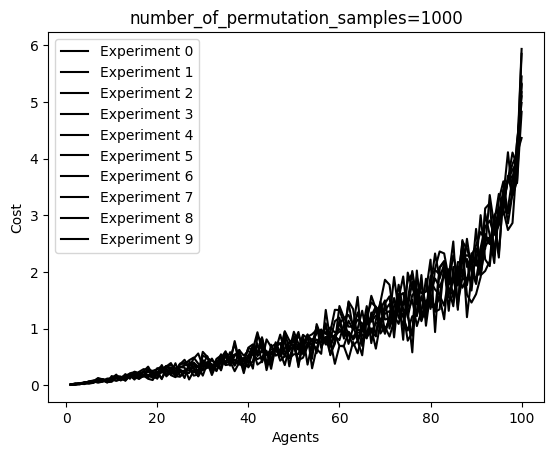

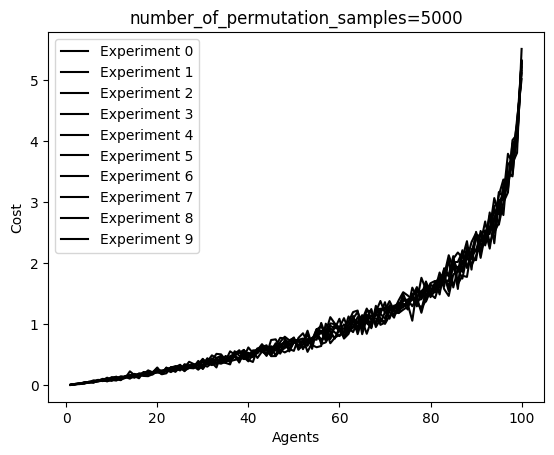

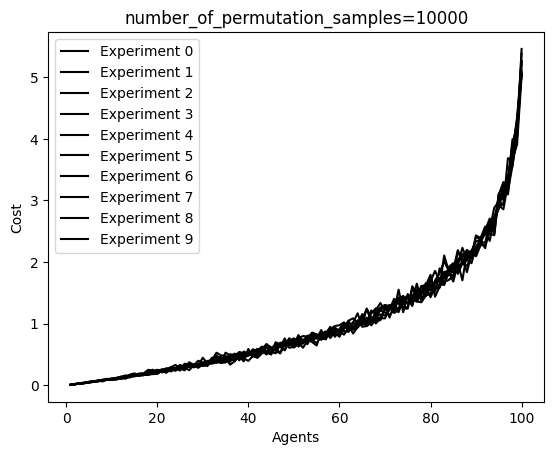

In [39]:
import matplotlib.pyplot as plt
import numpy as np

NUMBER_OF_EXPERIMENTS = 10
AGENTS = 100
NUMBER_OF_PERMUTATION_SAMPLES_POOL = [10, 50, 100, 500, 1000, 5000, 10000]

for number_of_permutation_samples in NUMBER_OF_PERMUTATION_SAMPLES_POOL:
    x = np.linspace(1, AGENTS, AGENTS)
    for experiment in range(NUMBER_OF_EXPERIMENTS):
        shapley_values = estimate_shapley_values(AGENTS, number_of_permutation_samples)
        y = shapley_values.values()
        plt.plot(x, y, color='black', label=f"Experiment {experiment}")
        plt.xlabel('Agents')
        plt.ylabel('Cost')
        plt.legend()
    plt.title(f"number_of_permutation_samples={number_of_permutation_samples}")
    plt.show()